# Mood Classifier Based on facial expression Using Deep learning

## Import important libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import keras
# OpneCV
# TensorFlows
# Keras
# PyTorch
# Scikit-learn
# Theano
import os
%matplotlib inline

Using TensorFlow backend.
/home/rahish/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rahish/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rahish/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rahish/anaconda3/lib/python3.7/site-packages/tenso

In [3]:
import sklearn

In [3]:
#load the dataset using pandas
data=pd.read_csv("data/aithon2020_level2_traning.csv")
data.head()

,emotion,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,Fear,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
1,Fear,55,55,55,55,55,54,60,68,54,...,90,83,77,53,37,34,30,34,30,57
2,Sad,20,17,19,21,25,38,42,42,46,...,29,36,68,91,85,93,97,99,107,118
3,Happy,4,2,13,41,56,62,67,87,95,...,59,66,80,74,69,99,28,3,7,12
4,Fear,255,255,255,255,255,255,255,255,255,...,94,21,22,51,71,80,82,79,79,83


In [67]:
test_data=data[400:1000]

In [74]:
test_data.to_csv('testdata.csv')
test=pd.read_csv('testdata.csv')
test=test.drop('Unnamed: 0',axis=1,inplace=True)

test.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [76]:
dd=pd.read_csv('testdata.csv')
dd.drop('Unnamed: 0',axis=1,inplace=True)

dd.head()

,emotion,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,Fear,134,132,140,132,118,107,116,113,98,...,71,80,73,78,76,71,70,67,60,53
1,Happy,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
2,Happy,250,255,211,39,19,20,18,17,22,...,44,40,42,39,40,50,65,75,80,88
3,Sad,173,158,117,90,79,85,81,77,73,...,47,47,55,65,85,88,125,133,148,160
4,Fear,246,246,245,244,248,228,189,174,120,...,241,235,239,241,239,241,241,243,244,242


In [79]:
dd.to_csv('testdata.csv',index=False)

In [80]:
ddss=pd.read_csv('testdata.csv')

ddss.head()

,emotion,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,Fear,134,132,140,132,118,107,116,113,98,...,71,80,73,78,76,71,70,67,60,53
1,Happy,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
2,Happy,250,255,211,39,19,20,18,17,22,...,44,40,42,39,40,50,65,75,80,88
3,Sad,173,158,117,90,79,85,81,77,73,...,47,47,55,65,85,88,125,133,148,160
4,Fear,246,246,245,244,248,228,189,174,120,...,241,235,239,241,239,241,241,243,244,242


In [4]:
#number of cols and rows in data
data.shape

(10817, 2305)

In [86]:
#for test data
with open('testdata.csv') as f:
    content = f.readlines()
    f.seek(0)
#     print(f.readline())

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)

x_test, y_test=[], []

for i in range(1,num_of_instances):
    try:
        emotion = lines[i].split(",")[0]
          
        val = lines[i].split(",")[1:]
            
        pixels = np.array(val, 'float32')
        
        #emotion = keras.utils.to_categorical(emotion, num_classes=3)
        
        y_test.append(emotion)
        x_test.append(pixels)
    except:
        print("",end="")
   

number of instances:  601


In [87]:
# data transformation for train and test sets
x_test = np.array(x_test, 'float32')
# y_train = np.array(y_train, 'float32')

x_test /= 255 #normalize inputs between [0, 1]
# x_test /= 255

x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')
# x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
# x_test = x_test.astype('float32')

print(x_test.shape[0],'test samples')
# print(x_test.shape[0], 'test samples')


600 test samples


In [88]:
x_test.shape

(600, 48, 48, 1)

In [90]:
y_test= []
x_test.shape
for i in range(1,num_of_instances):
    try:
        emotion = lines[i].split(",")[0]
          
            
        
        y_test.append(emotion)
    except:
        print("",end="")
   

In [91]:
y_test

['Fear',
 'Happy',
 'Happy',
 'Sad',
 'Fear',
 'Happy',
 'Happy',
 'Fear',
 'Sad',
 'Fear',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Fear',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Sad',
 'Happy',
 'Sad',
 'Sad',
 'Fear',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Sad',
 'Sad',
 'Fear',
 'Happy',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Fear',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Sad',
 'Happy',
 'Fear',
 'Fear',
 'Fear',
 'Happy',
 'Happy',
 'Sad',
 'Fear',
 'Happy',
 'Happy',
 'Sad',
 'Happy',
 'Fear',
 'Fear',
 'Fear',
 'Sad',
 'Fear',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Happy',
 'Fear',
 'Happy',
 'Happy',
 'Fear',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Fear',
 'Sad',
 'Happy',
 'Happy',
 'Fear',
 'Happy',
 'Happy',
 'Sad',
 'Happy',
 'Fear',
 'Happy',
 'Sad',
 'Happy',
 'Happy',
 'Fear',
 'Fe

In [5]:
#check len of rows and its intance len

with open("data/aithon2020_level2_traning.csv") as f:
    content = f.readlines()
    f.seek(0)
#     print(f.readline())

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))


number of instances:  10818
instance length:  1


In [6]:
#save the data in train and validation data
x_train, y_train, x_cv, y_cv = [], [], [], []

for i in range(1,num_of_instances):
    try:
        emotion = lines[i].split(",")[0]
          
        val = lines[i].split(",")[1:]
            
        pixels = np.array(val, 'float32')
        
        #emotion = keras.utils.to_categorical(emotion, num_classes=3)
        
        y_train.append(emotion)
        x_train.append(pixels)
    except:
        print("",end="")
   

In [7]:
# data transformation for train and test sets
x_train = np.array(x_train, 'float32')
# y_train = np.array(y_train, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
# x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
# x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
# x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
# print(x_test.shape[0], 'test samples')


10817 train samples


In [8]:
x_train.shape

(10817, 48, 48, 1)

In [9]:
y_train= []
x_train.shape
for i in range(1,num_of_instances):
    try:
        emotion = lines[i].split(",")[0]
          
            
        
        y_train.append(emotion)
    except:
        print("",end="")
   

In [10]:
lines[2].split(",")[0]

'Fear'

In [102]:
y_train[1]

'Happy'

In [101]:
type(y_test)

list

In [13]:
#  y_train = np.array(y_train, 'float32')

In [14]:
a_train=[]

In [10]:
import sklearn

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)

In [12]:
y_train

array([0, 0, 2, ..., 0, 2, 2])

In [13]:
x_train.shape

(10817, 48, 48, 1)

In [15]:
a_train=[]
for i in range(1,num_of_instances):
    emotion = y_train[i-1]
    emotion = keras.utils.to_categorical(emotion, 3)

    a_train.append(emotion)

In [16]:
y_train=a_train


In [17]:
y_train = np.array(y_train, 'float32')

In [18]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [19]:
y_train.shape


(10817, 3)

In [24]:
from sklearn.model_selection import train_test_split

X_train, Y_train, x_cv, y_cv =train_test_split(x_train,y_train,test_size=0.20, random_state=42)

In [29]:
X_train

array([[[[0.30588236],
         [0.36862746],
         [0.39607844],
         ...,
         [0.56078434],
         [0.5764706 ],
         [0.59607846]],

        [[0.3764706 ],
         [0.4117647 ],
         [0.4117647 ],
         ...,
         [0.5529412 ],
         [0.5686275 ],
         [0.5882353 ]],

        [[0.36862746],
         [0.34509805],
         [0.39607844],
         ...,
         [0.54509807],
         [0.56078434],
         [0.5764706 ]],

        ...,

        [[0.28627452],
         [0.25490198],
         [0.24313726],
         ...,
         [0.18431373],
         [0.18039216],
         [0.1882353 ]],

        [[0.30980393],
         [0.2784314 ],
         [0.2509804 ],
         ...,
         [0.1764706 ],
         [0.1764706 ],
         [0.18431373]],

        [[0.32941177],
         [0.3019608 ],
         [0.26666668],
         ...,
         [0.16078432],
         [0.16470589],
         [0.1764706 ]]],


       [[[0.77254903],
         [0.77254903],
         [0.76

In [20]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

#------------------------------
# #cpu - gpu configuration
# config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)
#------------------------------
#variables
num_classes = 3
#fear, happy, sad
batch_size = 256
epochs = 8
#------------

In [ ]:
score = model.evaluate(x_cv, y_cv, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [22]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

#-----------------------------
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
#-----------------------------

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

################################
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------
fit = True


#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one

W0912 19:26:02.313171 140538545104704 deprecation_wrapper.py:119] From /home/rahish/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0912 19:26:02.321734 140538545104704 deprecation_wrapper.py:119] From /home/rahish/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0912 19:26:02.994972 140538545104704 deprecation.py:323] From /home/rahish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/8
256/256 [==============================] - 201s 786ms/step - loss: 1.0507 - acc: 0.4642
Epoch 2/8
256/256 [==============================] - 202s 790ms/step - loss: 0.7449 - acc: 0.6542
Epoch 4/8
256/256 [==============================] - 198s 773ms/step - loss: 0.6445 - acc: 0.7097
Epoch 5/8
256/256 [==============================] - 203s 792ms/step - loss: 0.5389 - acc: 0.7611
Epoch 6/8
256/256 [==============================] - 207s 808ms/step - loss: 0.4440 - acc: 0.8090
Epoch 7/8
256/256 [==============================] - 207s 807ms/step - loss: 0.3241 - acc: 0.8679
Epoch 8/8
256/256 [==============================] - 208s 811ms/step - loss: 0.2361 - acc: 0.9078


In [26]:
#------------------------------
"""
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
"""
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('fear', 'happy', 'sad')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
#------------------------------

monitor_testset_results = False

if monitor_testset_results == True:
    #make predictions for test set
    predictions = model.predict(x_test)
    index = 0
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores

            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);

            plt.gray()
            plt.imshow(testing_img)
            plt.show()

            print(i)

            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1

#------------------------------
#make prediction for custom image out of test set

img = image.load_img("5_Sad.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()
#------------------------------

NameError: name 'model' is not defined

In [29]:
import pickle

In [30]:
model.save('save_model92.h5')


In [31]:
model.save_weights('save_model92_weights.h5')

In [4]:
mod=keras.models.load_model('save_model92.h5')

W0914 22:13:06.549616 140341082543936 deprecation_wrapper.py:119] From /home/rahish/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0914 22:13:06.599169 140341082543936 deprecation_wrapper.py:119] From /home/rahish/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0914 22:13:06.629320 140341082543936 deprecation_wrapper.py:119] From /home/rahish/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0914 22:13:06.683909 140341082543936 deprecation_wrapper.py:119] From /home/rahish/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0914 22:13:06.745158 140

In [5]:

from keras.preprocessing import image

img = image.load_img("5_Sad.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

/home/rahish/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [6]:
a=mod.predict(x_test)

NameError: name 'x_test' is not defined

In [152]:
result=[]
for i in a:
#     print(i)
    for j,k in enumerate(i):
        objects = ('Fear', 'Happy', 'Sad')
        if k==i.max():
#             print(k)
            print(objects[j])
            result.append(objects[j])
#         print(j)
#         print(k)
        
#     print(i.max())

    

Fear
Happy
Happy
Sad
Fear
Happy
Happy
Fear
Sad
Sad
Sad
Sad
Happy
Happy
Fear
Sad
Happy
Happy
Happy
Sad
Happy
Happy
Happy
Sad
Sad
Happy
Happy
Sad
Happy
Sad
Sad
Fear
Happy
Happy
Happy
Happy
Sad
Sad
Happy
Happy
Happy
Fear
Sad
Fear
Fear
Happy
Sad
Sad
Happy
Happy
Happy
Happy
Fear
Happy
Happy
Fear
Happy
Sad
Sad
Sad
Sad
Sad
Happy
Fear
Fear
Fear
Happy
Happy
Sad
Fear
Happy
Happy
Sad
Happy
Fear
Fear
Fear
Sad
Fear
Sad
Happy
Happy
Happy
Sad
Happy
Fear
Happy
Happy
Fear
Happy
Happy
Happy
Happy
Fear
Sad
Sad
Happy
Fear
Happy
Happy
Sad
Happy
Fear
Happy
Sad
Happy
Happy
Fear
Fear
Happy
Fear
Happy
Fear
Happy
Sad
Happy
Sad
Sad
Happy
Sad
Fear
Fear
Fear
Sad
Sad
Happy
Happy
Fear
Fear
Sad
Happy
Fear
Happy
Fear
Happy
Happy
Happy
Fear
Fear
Happy
Sad
Happy
Fear
Sad
Happy
Sad
Sad
Fear
Happy
Happy
Happy
Happy
Fear
Happy
Happy
Sad
Happy
Fear
Fear
Sad
Sad
Fear
Happy
Sad
Fear
Happy
Sad
Fear
Fear
Happy
Sad
Sad
Fear
Happy
Sad
Fear
Fear
Fear
Sad
Happy
Fear
Happy
Sad
Sad
Fear
Sad
Happy
Happy
Fear
Fear
Sad
Happy
Sad
Fear
Fe

In [151]:
# y_test

In [138]:
len(y_test)

600

In [144]:
len(result)

600

In [142]:
type(result)

list

In [153]:
result[1]==y_test[1]

True

In [154]:
result[1]

'Happy'

In [155]:
y_test[1]

'Happy'

In [156]:
cont=0
for i in range(len(y_test)):
    if result[i]==y_test[i]:
        cont=cont+1
print(cont)

559


In [157]:
(559*100)/600

93.16666666666667

In [110]:
for i in a:
    for j in i:
        print(j)

0.9690822
0.0040778583
0.02683997
1.6716136e-09
1.0
3.7308294e-09
1.3868653e-06
0.99999785
7.4388464e-07
0.2692756
0.0022490863
0.7284754
0.9991033
0.0008101157
8.6617365e-05
0.00985842
0.9897175
0.00042404354
2.823803e-05
0.99991345
5.829323e-05
0.99982196
0.00012273906
5.5350163e-05
0.02900966
0.0012412413
0.9697491
0.08866483
0.010941632
0.9003935
0.060656782
0.09305074
0.84629244
0.06594709
0.0009103434
0.93314254
1.936638e-06
0.99999154
6.5777936e-06
1.2017425e-06
0.9999912
7.660864e-06
0.96524465
0.00073201366
0.034023337
0.008812757
0.00072820095
0.9904591
1.5861349e-06
0.99999285
5.657575e-06
0.0017366748
0.9979183
0.0003450455
0.00054193457
0.9986333
0.00082470337
0.24645396
0.007969831
0.74557626
1.2690532e-06
0.9999987
3.7924636e-08
3.3446072e-06
0.99999297
3.6811316e-06
0.00019356843
0.99956197
0.00024449002
0.0036593543
0.00014594666
0.9961947
0.003887668
4.659499e-05
0.9960658
3.2015432e-06
0.99999595
8.249049e-07
1.2748025e-07
0.99999976
1.4237557e-07
0.0050624125
0.0001

0.00046912348
0.0011934371
0.3099897
0.0010157196
0.68899465
0.003323402
0.0004025194
0.9962741
0.025785675
0.9189283
0.05528602
0.048474096
0.02626532
0.9252606
0.008095128
0.003029396
0.9888755
3.7911878e-08
0.9999999
1.0024789e-07
0.007502236
0.9881151
0.004382719
0.019594055
0.97921914
0.0011868087
0.05189219
0.00040977835
0.94769806
0.6922043
0.0061464836
0.30164924
0.023920668
0.0012750824
0.9748043
0.96873426
0.0138647035
0.017401068
1.979325e-05
0.9999496
3.0612126e-05
0.16147766
0.00033877898
0.8381835
0.11988252
0.027121563
0.852996
4.2405434e-05
0.99978584
0.00017179837
0.21439108
0.0030941514
0.78251475
0.00012061041
0.9993693
0.00051011663
0.9999008
8.195034e-05
1.717001e-05


In [53]:

for i,j in enumerate(a[0]):
    objects = ('fear', 'happy', 'sad')
    if j==a.max():
        print(j)
        print(objects[i])
            

0.70512307
sad


In [48]:
objects[1]

'happy'

In [41]:
a.max()

AttributeError: 'numpy.float32' object has no attribute 'index'

In [35]:
a

0.70512307

In [18]:
a[0][0]

0.2842566

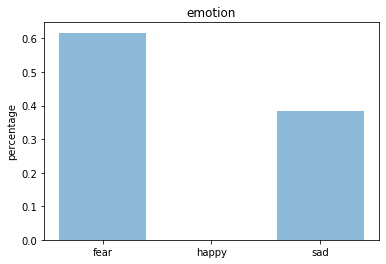

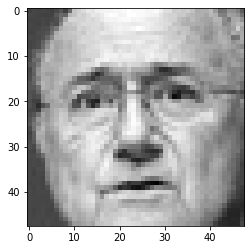

In [7]:
#------------------------------
"""
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
"""
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('fear', 'happy', 'sad')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
#------------------------------

monitor_testset_results = False

if monitor_testset_results == True:
    #make predictions for test set
    predictions = mod.predict(x_test)
    index = 0
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores

            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);

            plt.gray()
            plt.imshow(testing_img)
            plt.show()

            print(i)

            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1

#------------------------------
#make prediction for custom image out of test set

img = image.load_img("1_Fear.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = mod.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()
#------------------------------

In [8]:
print(history.history)

NameError: name 'history' is not defined

In [5]:
face_cascade = cv2.CascadeClassifier('../../Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [6]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        roi = face_img[x:x+w,y:y+w] # BOTTOM RIGHT CORNER
        
        
    return roi
    

In [ ]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        roi = face_img[y_offset:1401,x_offset:943] # BOTTOM RIGHT CORNER
        
    return face_img
    

In [11]:
img=cv2.imread('5_Sad.jpg',0)

In [13]:
result=detect_face(img)

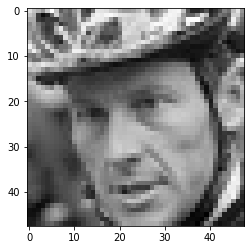

In [14]:
plt.imshow(result,cmap='gray')
print()

In [7]:
import cv2
cap=cv2.VideoCapture(0)
while True:
    ret ,frame=cap.read(0)
    frame=detect_face(frame)
    
    x = image.img_to_array(frame)
    x = np.expand_dims(x, axis = 0)

    x /= 255

    custom = mod.predict(x)
    emotion_analysis(custom[0])

    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);

    
    font = cv2.FONT_HERSHEY_COMPLEX
    te='text'
    cv2.putText(frame,text=custom,org=(10,60), fontFace=font,fontScale= 1,color=(255,225,0),thickness=4)
    cv2.imshow('Video face detection',frame)
    
    c=cv2.waitKey(1)
    if c==27:
        break
        
cap.release()
cv2.destroyAllWindows()

UnboundLocalError: local variable 'roi' referenced before assignment

In [ ]:
def emotion_analysis(emotions):
    objects = ('fear', 'happy', 'sad')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
#------------------------------

monitor_testset_results = False

if monitor_testset_results == True:
    #make predictions for test set
    predictions = mod.predict(x_test)
    index = 0
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores

            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);

            plt.gray()
            plt.imshow(testing_img)
            plt.show()

            print(i)

            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1

#------------------------------
#make prediction for custom image out of test set

img = image.load_img("1_Fear.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = mod.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()